In [1]:
import pandas as pd
import numpy as np
import pypsa

In [2]:
dfa = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1a', skiprows=1)
dfb = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1b', skiprows=1)
dfc = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1c', skiprows=1)
dfd = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-2-1d', skiprows=1)
dfe = pd.read_excel('../data/ETYS Appendix B 2022.xlsx', sheet_name='B-5-1', skiprows=1)
df = pd.concat([dfa, dfb, dfc, dfd, dfe])
# df["Node 1"] = df["Node 1"].str[:-2]
# df["Node 2"] = df["Node 2"].str[:-2]
# df = df.loc[df['Circuit Type'] == 'OHL']
df = df[df['Node 1'] != df['Node 2']]
df.rename(columns={'Node 1': 'bus0', 'Node 2': 'bus1'}, inplace=True)
df.index.name = 'name'
df.reset_index(drop=True, inplace=True)
df

,bus0,bus1,OHL Length (km),Cable Length (km),Circuit Type,R (% on 100 MVA),X (% on 100 MVA),B (% on 100 MVA),Winter Rating (MVA),Spring Rating (MVA),...,Autumn Rating (MVA),OFTO,Station,OHL Length(km),Cable Length(km),R (% on 100MVA),X (% on 100MVA),B (% on 100MVA),Rating (MVA),Voltage (kV)
0,ABBA1-,DYCE1J,0.000,7.800,Cable,0.1092,1.2324,10.140,173.0,158.0,...,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABNE1Q,ABNE1R,0.000,1.000,Cable,0.0100,0.0100,0.000,9999.0,9999.0,...,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABNE1Q,CHAR1-,24.500,0.000,OHL,2.4900,5.6600,1.220,132.0,123.0,...,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABNE1R,AMUL1G,28.099,0.001,Composite,2.8706,6.5818,1.397,132.0,123.0,...,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACHR1R,INVE1J,21.170,0.000,OHL,0.3387,3.9588,1.291,739.0,710.0,...,710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,HEYS41,WDSO41,NaN,NaN,Cable,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.2250,0.0004,0.0024,1.7417,346.000000,400.0
1453,HEYS41,WDSO42,NaN,NaN,Cable,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.2250,0.0004,0.0024,1.7417,346.000000,400.0
1454,WERO11,WERW11,NaN,NaN,Cable,NaN,NaN,NaN,NaN,NaN,...,NaN,TC Westermost Rough OFTO Limited,Westermost Rough Offshore Wind Farm,0.0,25.8335,0.2949,1.4823,45.7125,140.000000,150.0
1455,HEDO21,WERO21,NaN,NaN,Cable,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.3680,0.0030,0.0122,1.2704,256.780862,275.0


In [3]:
# buses from line data
df_buses = pd.concat([df['bus0'], df['bus1']]).unique()
df_buses = pd.DataFrame(df_buses, columns=['name'])
df_buses.index = df_buses['name']
df_buses.index.name = 'name'
df_buses

,name
name,
ABBA1-,ABBA1-
ABNE1Q,ABNE1Q
ABNE1R,ABNE1R
ACHR1R,ACHR1R
AIGA1Q,AIGA1Q
...,...
WDSO41,WDSO41
WDSO42,WDSO42
WERW11,WERW11


In [4]:
# FES data with GSP locations
df2 = pd.read_excel('../data/Regional breakdown of FES23 data (ETYS 2023 Appendix E).xlsb', sheet_name='GSP info', skiprows=4, index_col=1)
# df2.index = df2.index.str[:4]
df2 = df2[~df2.index.duplicated(keep='first')]
df2.rename(columns={'Latitude':'y', 'Longitude': 'x'}, inplace=True)
# df2.drop(['ROTI'], inplace=True)
df2.drop(columns=['Name'], inplace=True)
df2.index.name = 'name'
df2['name'] = df2.index
df2

,Unnamed: 0,GSP Group,Minor FLOP,y,x,Comments,name
name,,,,,,,
ABNE_P,NaN,_P,T4,56.339456,-3.293751,NaN,ABNE_P
ABTH_1,NaN,_K,H2,51.385210,-3.403318,NaN,ABTH_1
ABHA1,NaN,_L,F6,50.471559,-3.729489,NaN,ABHA1
ACTL_C,NaN,_C,A7,51.534951,-0.257050,NaN,ACTL_C
ACTL_2,NaN,_H,A7,51.534951,-0.257050,NaN,ACTL_2
...,...,...,...,...,...,...,...
G_EXTRA_8,NaN,_N,S6,55.646024,-4.793802,"GSP ""SACO"" modelled as 2 parts (split busbar)",G_EXTRA_8
G_EXTRA_9,NaN,_N,S6,55.646024,-4.793802,"GSP ""SACO"" modelled as 2 parts (split busbar)",G_EXTRA_9
G_EXTRA_10,NaN,_N,S6,55.821124,-4.364302,"GSP ""CROO"" modelled as 2 parts (split busbar)",G_EXTRA_10


In [5]:
# Step 1: Define a function that takes an index and returns the corresponding x and y values from `df2` where the first 4 characters of the index match.
def get_xy(index):
    matching_df2 = df2[df2.index.str[:4] == index[:4]]
    if not matching_df2.empty:
        return matching_df2.iloc[0]['x'], matching_df2.iloc[0]['y']
    else:
        return None, None

# Step 2: Apply this function to the index of `df_buses` to create the new columns.
df_buses['x'], df_buses['y'] = zip(*df_buses.index.map(get_xy))
df_buses = df_buses.fillna(np.nan)
df_buses

,name,x,y
name,,,
ABBA1-,ABBA1-,NaN,NaN
ABNE1Q,ABNE1Q,-3.293751,56.339456
ABNE1R,ABNE1R,-3.293751,56.339456
ACHR1R,ACHR1R,NaN,NaN
AIGA1Q,AIGA1Q,NaN,NaN
...,...,...,...
WDSO41,WDSO41,NaN,NaN
WDSO42,WDSO42,NaN,NaN
WERW11,WERW11,NaN,NaN


In [6]:
# ETYS load data (ultimately from FES)
df3 = pd.read_excel('../data/ETYS23 Appendix G_1.xlsx', skiprows=6, index_col=1)
df3 = df3[['23/24']].dropna().drop(['Node'])
df3['norm'] = df3 / df3[['23/24']].sum()
df3_load = df3[['23/24']].copy()
df3_load['bus'] = df3_load.index
df3_load.rename(columns={'23/24': 'p_set'}, inplace=True)
df3_load.reset_index(drop=True, inplace=True)
df3_load.index.name = 'name'
df3_load

,p_set,bus
name,,
0,23.05,ABHA4B
1,26.507017,ABNE10
2,21.98258,ABTH20
3,21.98258,ACHR1R
4,0.026,AIGA1Q
...,...,...
454,14.55,KEAR40
455,14.55,KEIT10
456,388.7,KEIT20


In [7]:
import pypsa
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

network = pypsa.Network()
network.set_snapshots(range(1))
network.import_components_from_dataframe(df_buses, "Bus")
network.import_components_from_dataframe(df, "Line")
network.import_components_from_dataframe(df3_load, "Load")

# Create a copy of the buses DataFrame to avoid modifying it while iterating
new_buses = network.buses.copy()

# Initialize the previous counts
prev_count_x = len(network.buses) + 1
prev_count_y = len(network.buses) + 1

while True:
    # Get the current counts
    curr_count_x = network.buses['x'].isna().sum()
    curr_count_y = network.buses['y'].isna().sum()

    # If neither count has changed, break the loop
    if prev_count_x == curr_count_x and prev_count_y == curr_count_y:
        break

    # Update the previous counts
    prev_count_x = curr_count_x
    prev_count_y = curr_count_y

    # Print the number of buses with NaN coordinates
    print(f"There are {curr_count_x + curr_count_y} buses with NaN coordinates.")
    
    # For each bus with NaN coordinates
    for bus in network.buses[network.buses['x'].isna() | network.buses['y'].isna()].index:
        # Find lines connected to this bus
        connected_lines = network.lines[(network.lines['bus0'] == bus) | (network.lines['bus1'] == bus)]
        # Get the buses at the ends of these lines
        connected_buses = network.buses.loc[pd.concat([connected_lines['bus0'], connected_lines['bus1']]).unique()]
        # Exclude the current bus
        connected_buses = connected_buses[connected_buses.index != bus]
        # If there are any connected buses with known coordinates
        if not connected_buses.dropna(subset=['x', 'y']).empty:
            # Estimate the coordinates of the current bus as the mean of the coordinates of the connected buses
            network.buses.loc[bus, ['x', 'y']] = connected_buses[['x', 'y']].mean()
            
# remove buses with NaN coordinates
network.buses.dropna(subset=['x', 'y'], inplace=True)

# Create a graph from the network
G = nx.Graph()
for _, line in network.lines.iterrows():
    G.add_edge(line.bus0, line.bus1)

# Find the isolated nodes (buses)
isolated_buses = list(nx.isolates(G))

# Print the isolated buses
print(f"There are {len(isolated_buses)} isolated buses: {isolated_buses}")

Index(['1', '2', '5', '10', '11', '12', '13', '14', '15', '16',
       ...
       '440', '446', '448', '449', '450', '453', '454', '455', '456', '457'],
      dtype='object', name='name', length=261)


There are 1360 buses with NaN coordinates.
There are 554 buses with NaN coordinates.
There are 390 buses with NaN coordinates.
There are 370 buses with NaN coordinates.
There are 0 isolated buses: []


Index(['1', '2', '5', '10', '11', '12', '13', '14', '15', '16',
       ...
       '440', '446', '448', '449', '450', '453', '454', '455', '456', '457'],
      dtype='object', name='Load', length=271)
Index(['21', '70', '116', '117', '118', '119', '146', '147', '148', '149',
       ...
       '1437', '1438', '1441', '1442', '1445', '1446', '1447', '1450', '1451',
       '1454'],
      dtype='object', name='Line', length=131)
Index(['21', '70', '116', '117', '118', '119', '146', '147', '148', '149',
       ...
       '1437', '1438', '1441', '1442', '1445', '1446', '1447', '1450', '1451',
       '1454'],
      dtype='object', name='Line', length=131)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455',
       '1456'],
      dtype='object', name='Line', length=1457)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1447', '1448', '1449', '1450', '1451', '1452', '1453', '1

           p_set     bus carrier type  q_set  sign
Load                                              
0      23.050000  ABHA4B                 0.0  -1.0
1      26.507017  ABNE10                 0.0  -1.0
2      21.982580  ABTH20                 0.0  -1.0
3      21.982580  ACHR1R                 0.0  -1.0
4       0.026000  AIGA1Q                 0.0  -1.0
...          ...     ...     ...  ...    ...   ...
454    14.550000  KEAR40                 0.0  -1.0
455    14.550000  KEIT10                 0.0  -1.0
456   388.700000  KEIT20                 0.0  -1.0
457    43.224386  KEMS40                 0.0  -1.0
458   182.460000  KEMS4A                 0.0  -1.0

[459 rows x 6 columns]


c:\Users\alyden\AppData\Local\miniforge3\envs\pypsa-lmp\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


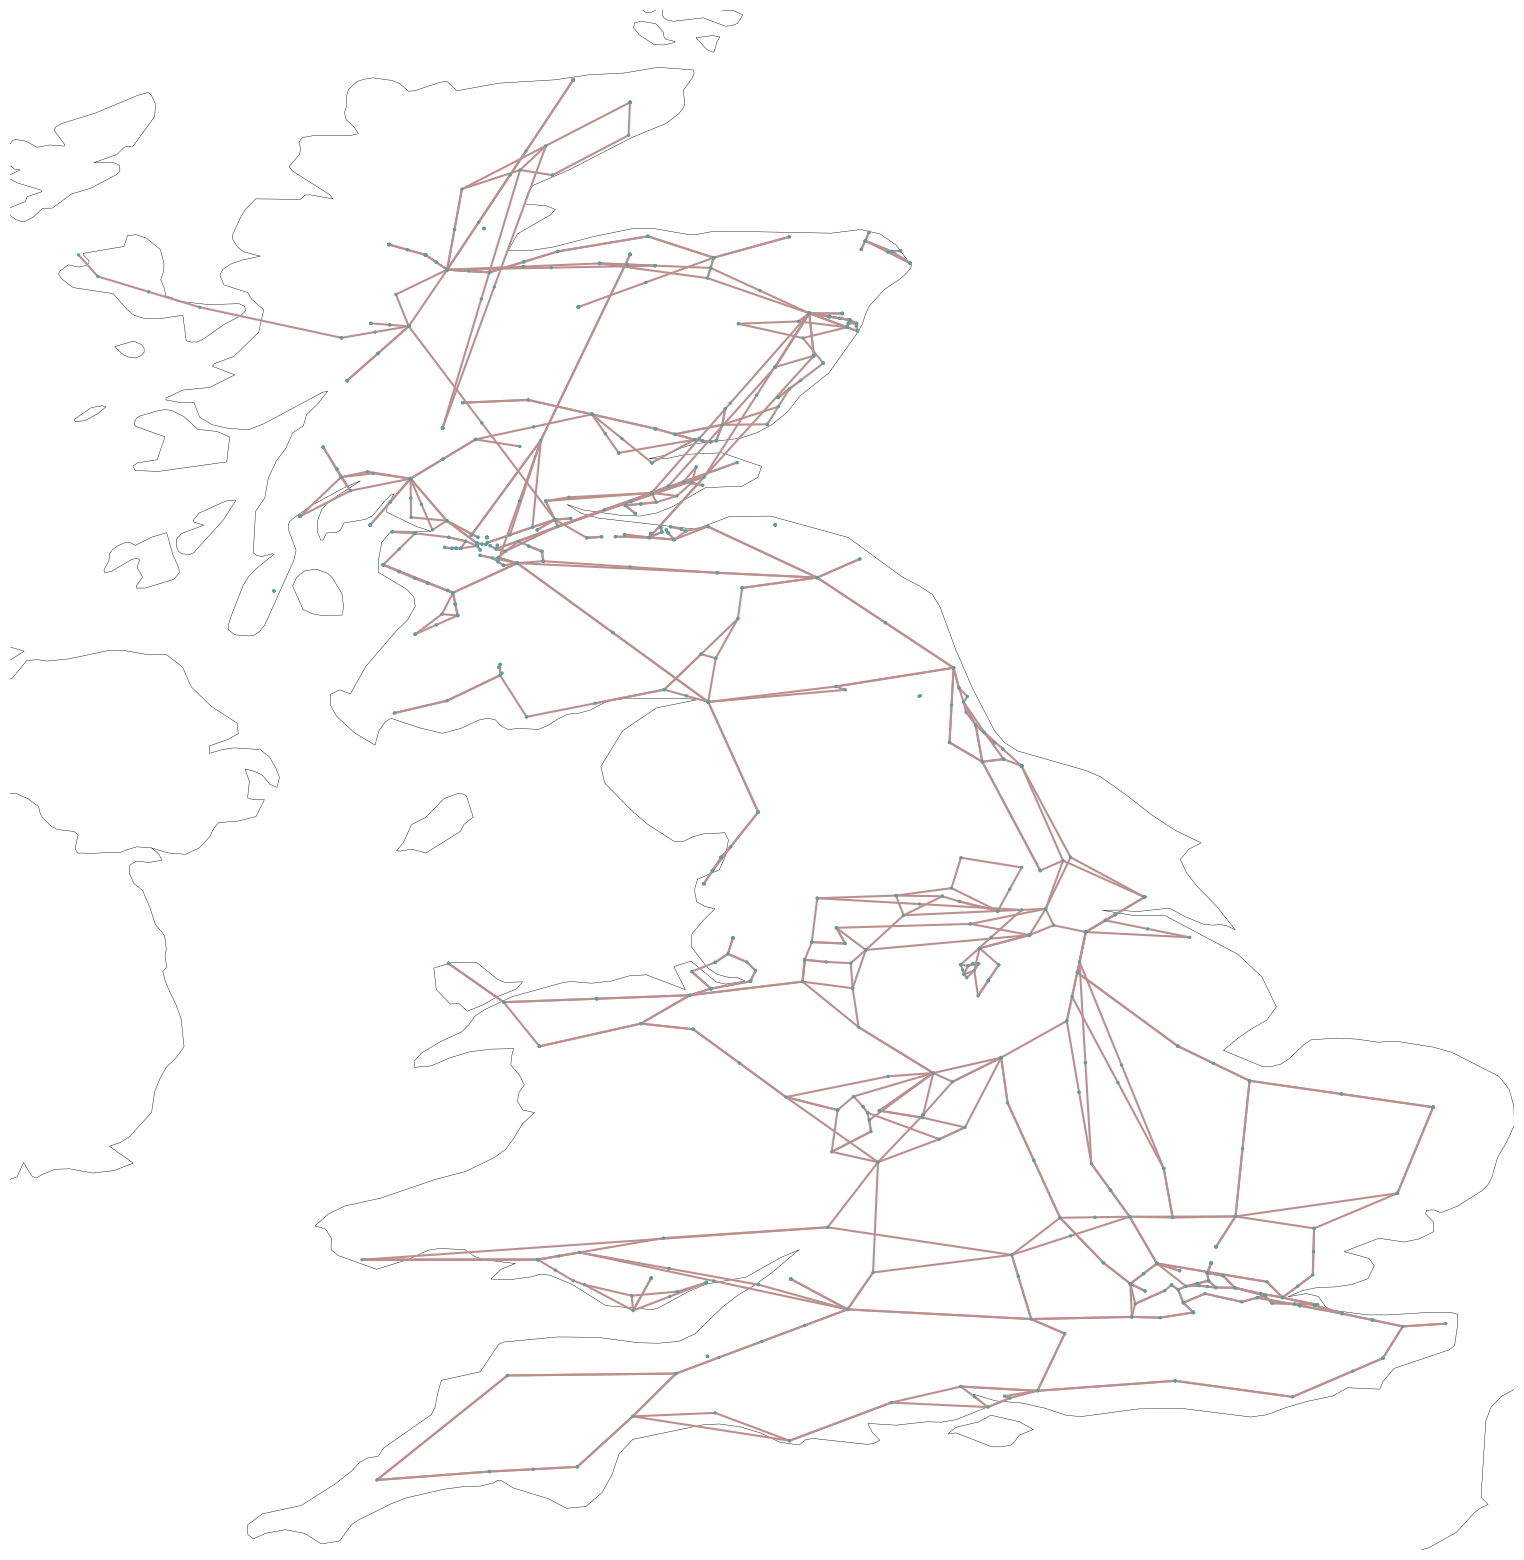

In [8]:
print(network.loads)
plt.rc("figure", figsize=(20, 20))

# Now you can plot the network
network.plot(bus_sizes=0.0001)
network.consistency_check()